**PERSIAPAN DATASET**

In [13]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import shutil
from sklearn.model_selection import train_test_split

In [14]:
# Tentukan path ke dataset dan kategori yang ada
dataset_dir = 'dataset'
categories = ['dark circle', 'acne', 'wrinkle']

# Tentukan ukuran target untuk resize
img_height, img_width = 150, 150

**MEMBUAT FOLDER UNTUK DATASET**

In [15]:
# Folder tujuan untuk train dan validation
TRAIN_DIR = 'data/train/'
VALIDATION_DIR = 'data/validation/'
split_ratio = 0.8  # Proporsi data train dan validation

# Membuat folder train dan validation jika belum ada
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VALIDATION_DIR, exist_ok=True)

**SPLIT DAN PRE-PROCESSING DATASET**

In [16]:
# Daftar untuk menyimpan data gambar dan label
image_data = []
labels = []

# Membagi dataset untuk setiap kategori
for label, category in enumerate(categories):
    category_dir = os.path.join(dataset_dir, category)
    
    # Ambil semua gambar di dalam folder kategori
    images = [img for img in os.listdir(category_dir) if img.endswith(('jpg', 'png', 'jpeg'))]

    # Membagi data menggunakan train_test_split
    train_images, validation_images = train_test_split(images, test_size=1 - split_ratio)

    # Membuat folder kategori di dalam train dan validation
    train_folder = os.path.join(TRAIN_DIR, category)
    validation_folder = os.path.join(VALIDATION_DIR, category)
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(validation_folder, exist_ok=True)

    # Proses gambar dan pindahkan ke folder train dan validation
    for img_name in train_images:
        img_path = os.path.join(category_dir, img_name)
        img = load_img(img_path, target_size=(img_height, img_width))  # Resize gambar
        img_array = img_to_array(img)  # Konversi gambar menjadi array NumPy
        img_array = img_array / 255.0  # Normalisasi gambar

        # Simpan gambar dan label
        image_data.append(img_array)
        labels.append(label)

        # Salin gambar ke folder train
        shutil.copy(img_path, os.path.join(train_folder, img_name))

    for img_name in validation_images:
        img_path = os.path.join(category_dir, img_name)
        img = load_img(img_path, target_size=(img_height, img_width))  # Resize gambar
        img_array = img_to_array(img)  # Konversi gambar menjadi array NumPy
        img_array = img_array / 255.0  # Normalisasi gambar

        # Simpan gambar dan label
        image_data.append(img_array)
        labels.append(label)

        # Salin gambar ke folder validation
        shutil.copy(img_path, os.path.join(validation_folder, img_name))


**MONGONVERSI DATA GAMBAR MENJADI ARRAY**

In [17]:
# Mengonversi daftar menjadi array NumPy
image_data = np.array(image_data)
labels = np.array(labels)

# Menampilkan informasi mengenai data yang telah diproses
print(f"Total gambar yang diproses: {len(image_data)}")
print(f"Shape dari data gambar: {image_data.shape}")
print(f"Shape dari labels: {labels.shape}")


Total gambar yang diproses: 929
Shape dari data gambar: (929, 150, 150, 3)
Shape dari labels: (929,)


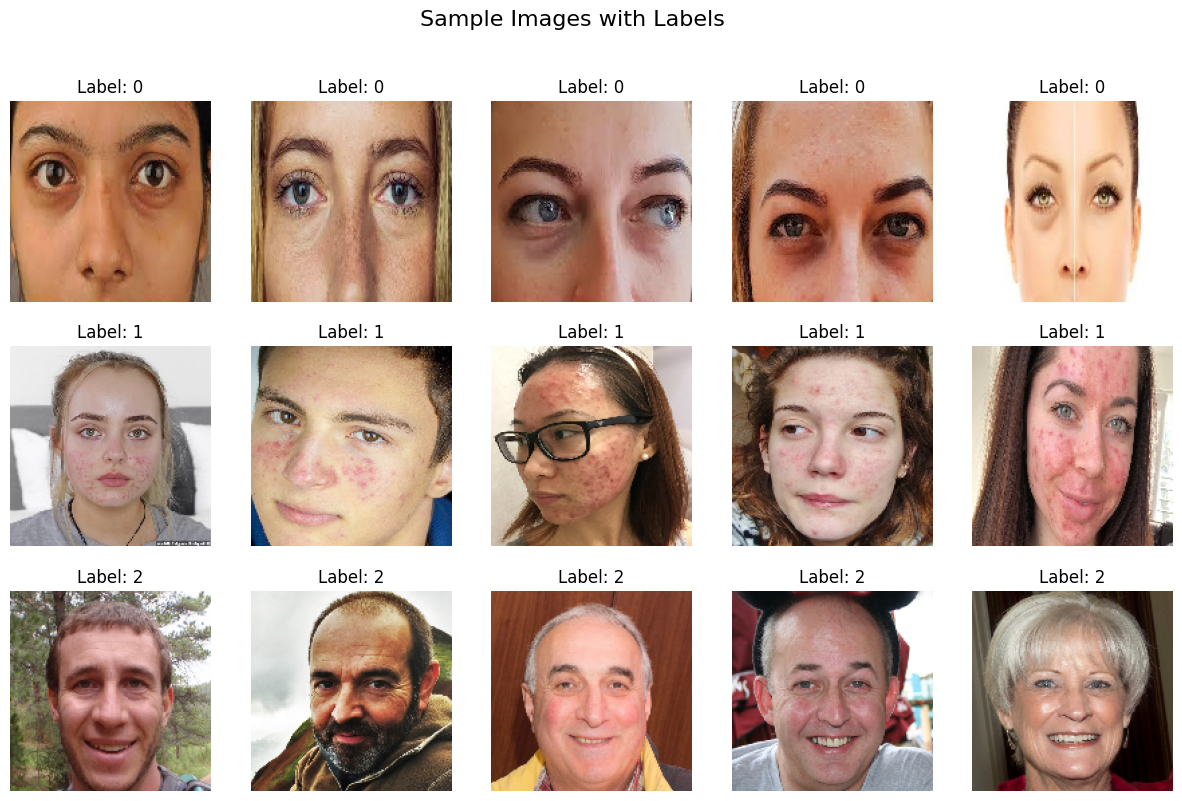

In [18]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Tentukan path ke dataset
dataset_dir = 'dataset'

# List kategori yang ada di dalam folder dataset
categories = ['dark circle', 'acne', 'wrinkle']

# Buat list untuk menyimpan gambar dan labelnya
images = []
labels = []

# Loop melalui setiap kategori untuk memuat gambar dan memberikan label
for label, category in enumerate(categories):
    category_dir = os.path.join(dataset_dir, category)
    
    # Ambil 5 gambar pertama dari folder kategori
    for img_name in os.listdir(category_dir)[:5]:
        img_path = os.path.join(category_dir, img_name)
        
        # Load gambar
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))  # Resize gambar
        
        # Tambahkan gambar dan label ke list
        images.append(img)
        labels.append(label)

# Tentukan jumlah gambar yang ingin ditampilkan
num_images = len(images)

# Tentukan jumlah kolom (misalnya 5 gambar per baris)
cols = 5
rows = (num_images + cols - 1) // cols  # Menyesuaikan jumlah baris dengan jumlah gambar

# Buat grid subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
fig.suptitle('Sample Images with Labels', fontsize=16)

# Loop untuk menampilkan gambar
for i, ax in enumerate(axes.flat):  # Menggunakan axes.flat untuk 2D grid
    if i < num_images:  # Pastikan hanya gambar yang ada yang ditampilkan
        ax.imshow(images[i])
        ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')  # Menyembunyikan axis

# Tampilkan plot
plt.show()


**AUGMENTASI DATA**

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menyiapkan generator augmentasi untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalisasi gambar
    rotation_range=40,  # Rotasi gambar hingga 40 derajat
    width_shift_range=0.2,  # Geser gambar secara horizontal
    height_shift_range=0.2,  # Geser gambar secara vertikal
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Zoom in/out gambar
    horizontal_flip=True,  # Flip gambar secara horizontal
    fill_mode='nearest'  # Mengisi piksel yang hilang akibat transformasi
)

# Menyiapkan generator untuk data validasi (tanpa augmentasi, hanya normalisasi)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [ ]:
# Membaca data gambar dari direktori train dan validation menggunakan flow_from_directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,  # Direktori gambar pelatihan
    target_size=(img_height, img_width),  # Ukuran gambar yang akan diresize
    batch_size=32,  # Jumlah gambar per batch
    class_mode='categorical'  # Label dalam bentuk integer
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,  # Direktori gambar validasi
    target_size=(img_height, img_width),  # Ukuran gambar yang akan diresize
    batch_size=32,  # Jumlah gambar per batch
    class_mode='categorical'  # Label dalam bentuk integer
)

# # Membaca data gambar dari direktori train dan validation menggunakan flow_from_directory
# train_generator = train_datagen.flow_from_directory(
#     TRAIN_DIR,  # Direktori gambar pelatihan
#     target_size=(img_height, img_width),  # Ukuran gambar yang akan diresize
#     batch_size=32,  # Jumlah gambar per batch
#     class_mode='categorical'  # Label dalam bentuk integer
# )

# validation_generator = validation_datagen.flow_from_directory(
#     VALIDATION_DIR,  # Direktori gambar validasi
#     target_size=(img_height, img_width),  # Ukuran gambar yang akan diresize
#     batch_size=32,  # Jumlah gambar per batch
#     class_mode='categorical'  # Label dalam bentuk integer
# )

Found 742 images belonging to 3 classes.
Found 187 images belonging to 3 classes.


**MEMBANGUN MODEL**

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Tentukan jumlah kelas
num_classes = len(categories)

# Memuat model VGG16 yang sudah dilatih sebelumnya (pre-trained) tanpa fully connected layer (top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Menonaktifkan pembaruan bobot untuk model pre-trained
base_model.trainable = False

# Membangun model
model = Sequential([
    base_model,  # Menambahkan model pre-trained
    GlobalAveragePooling2D(),  # Pooling untuk hasil konvolusi
    Dense(512, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer dengan softmax untuk klasifikasi multi-kelas
])

# Kompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.optimizers import RMSprop

# # Tentukan jumlah kelas
# num_classes = len(categories)

# # Memuat model VGG16 yang sudah dilatih sebelumnya (pre-trained) tanpa fully connected layer (top=False)
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# # Menonaktifkan pembaruan bobot untuk model pre-trained
# base_model.trainable = False

# # Membangun model
# model = Sequential([
#     base_model,  # Menambahkan model pre-trained
#     GlobalAveragePooling2D(),  # Pooling untuk hasil konvolusi
#     Dense(512, activation='relu'),  # Fully connected layer
#     Dense(3, activation='softmax')  # Output layer dengan softmax untuk klasifikasi multi-kelas
# ])

# # Kompilasi model
# model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# # Menampilkan ringkasan model
# model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,978,883 (57.14 MB)

 Trainable params: 264,195 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**FINE TUNING DAN MELATIH MODEL**

In [22]:
# Membuka lapisan dari model pre-trained untuk fine-tuning
base_model.trainable = True

# Membekukan semua lapisan kecuali lapisan terakhir
fine_tune_at = 15  # Jumlah lapisan yang akan dibekukan
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Kompilasi ulang model setelah fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

# # Membuka lapisan dari model pre-trained untuk fine-tuning
# base_model.trainable = True

# # Membekukan semua lapisan kecuali lapisan terakhir
# fine_tune_at = 15  # Jumlah lapisan yang akan dibekukan
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

# # Kompilasi ulang model setelah fine-tuning
# model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# # Melatih model
# history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3895 - loss: 1.1116 - val_accuracy: 0.6952 - val_loss: 0.9060
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6416 - loss: 0.9019 - val_accuracy: 0.7487 - val_loss: 0.7311
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7332 - loss: 0.7269 - val_accuracy: 0.7647 - val_loss: 0.6129
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7773 - loss: 0.6216 - val_accuracy: 0.7754 - val_loss: 0.5018
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8380 - loss: 0.4873 - val_accuracy: 0.7968 - val_loss: 0.4309
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8381 - loss: 0.4159 - val_accuracy: 0.8556 - val_loss: 0.3728
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8301 - loss: 0.4384 - val_accuracy: 0.8824 - val_loss: 0.3194
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8961 - loss: 0.3314 - val_accuracy: 0.8770 - val_loss:

In [23]:
# Menyimpan model
model.save('model_transfer_learning.h5')

# Mengevaluasi model
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9080 - loss: 0.2051
Test accuracy: 91.44%
Test loss: 20.93%


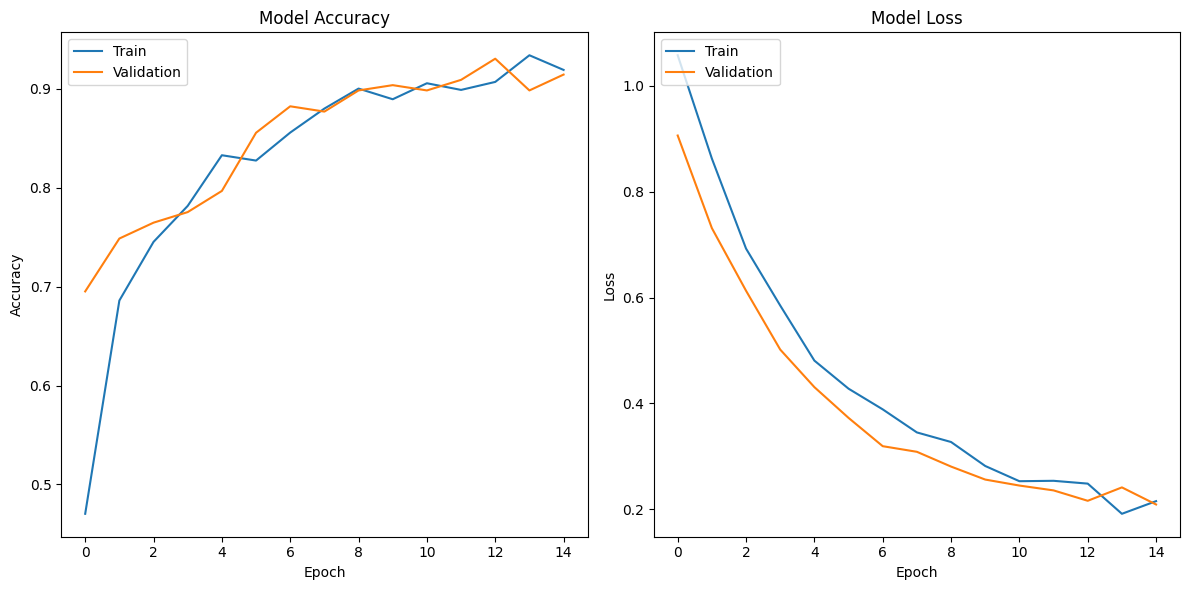

In [24]:
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi training dan validation accuracy serta loss
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # Membuat subplot untuk accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)  # Membuat subplot untuk loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

# Misalkan `history` adalah objek yang menyimpan hasil pelatihan model
# Plot training results
plot_history(history)


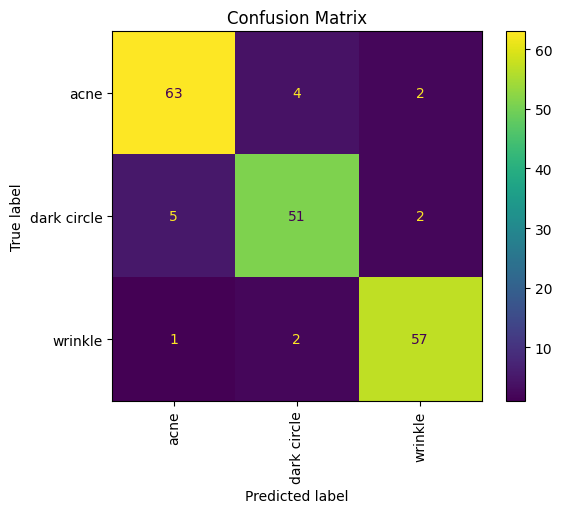

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Fungsi untuk menampilkan confusion matrix
# def plot_confusion_matrix(y_true, y_pred, class_names):
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Membuat plot confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()

# # Menggunakan model untuk memprediksi data validasi
# # Misalkan `model` adalah model yang telah dilatih dan `validation_generator` adalah generator untuk data validasi
# y_true = validation_generator.classes  # Data label sebenarnya (true labels)
# y_pred = model.predict(validation_generator)  # Prediksi model

# # Mengambil label prediksi (menggunakan argmax untuk multi-class classification)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Mendapatkan nama kelas
# class_names = validation_generator.class_indices.keys()

# # Menampilkan confusion matrix
# plot_confusion_matrix(y_true, y_pred_classes, class_names)

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Fungsi untuk menampilkan confusion matrix
# def plot_confusion_matrix(y_true, y_pred, class_names):
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Membuat plot confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()

# # Menggunakan model untuk memprediksi data validasi
# y_true = validation_generator.classes  # Data label sebenarnya (true labels)
# y_pred_prob = model.predict(validation_generator)  # Probabilitas prediksi model

# # Mengubah probabilitas menjadi label biner
# y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()  # Threshold default = 0.5

# # Mendapatkan nama kelas
# class_names = list(validation_generator.class_indices.keys())  # ['class_0', 'class_1']

# # Menampilkan confusion matrix
# plot_confusion_matrix(y_true, y_pred_classes, class_names)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Mendapatkan label sebenarnya dan prediksi dari validation_generator
y_true = []
y_pred = []

# Loop melalui validation_generator
for batch_images, batch_labels in validation_generator:
    # Prediksi batch
    predictions = model.predict(batch_images, verbose=0)
    
    # Menambahkan label asli (menggunakan argmax untuk multiclass)
    y_true.extend(np.argmax(batch_labels, axis=1))  # Konversi one-hot encoding ke kelas numerik
    
    # Menambahkan prediksi model (menggunakan argmax untuk multiclass)
    y_pred.extend(np.argmax(predictions, axis=1))  # Prediksi probabilitas ke kelas numerik
    
    # Berhenti setelah semua data diproses
    if len(y_true) >= validation_generator.samples:
        break

# Membalik mapping dari class_indices untuk mendapatkan nama kelas
classes = {v: k for k, v in validation_generator.class_indices.items()}

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(classes.values()))
disp.plot(cmap="viridis", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()



**MENGUJI MODEL DENGAN GAMBAR BARU**

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Memuat dan memproses gambar
img_path = 'wrinkle.png'  # Ganti dengan path gambar baru
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Normalisasi
img_array = np.expand_dims(img_array, axis=0)  # Menambah dimensi batch

# Prediksi
prediction = model.predict(img_array)  # Hasil berupa probabilitas untuk setiap kelas

# Menentukan kelas dengan probabilitas tertinggi
predicted_class = np.argmax(prediction)  # Mengambil indeks kelas dengan probabilitas tertinggi

# Menentukan nama kelas
categories = {0: 'dark circle', 1: 'acne', 2: 'wrinkle'}  # Sesuaikan dengan nama kelas Anda
print(f"Predicted class: {categories[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted class: wrinkle
